In [2]:
from pandas import DataFrame
from pandas import read_csv
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

/home/sudaraka/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df = read_csv('with_timestamp.csv', header=0, index_col=0)

In [4]:
df.drop("@timestamp", axis=1, inplace=True)
df.head()

,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,...,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct,anomaly
0,3.5818,0.0474,0.0312,0.1058,0.4182,0.2338,0.698,12.601,0.165,0.0,...,0.68,0.97,1.00,0.170,0.243,0.250,0.6904,0.0,0.9620,0
1,3.5080,0.0934,0.0271,0.1054,0.4920,0.2661,0.572,11.104,0.137,0.0,...,0.58,0.96,0.97,0.145,0.240,0.243,0.6903,0.0,0.9626,0
2,3.5337,0.1136,0.0291,0.1025,0.4663,0.2211,0.572,11.104,0.137,0.0,...,0.65,0.96,0.97,0.163,0.240,0.243,0.6904,0.0,0.9628,0
3,3.5742,0.0503,0.0201,0.0916,0.4258,0.2637,0.572,11.104,0.137,0.0,...,0.68,0.95,0.95,0.170,0.238,0.238,0.6903,0.0,0.9635,0
4,3.5454,0.0705,0.0268,0.1051,0.4546,0.2522,0.572,11.104,0.137,0.0,...,0.68,0.95,0.95,0.170,0.238,0.238,0.6905,0.0,0.9638,0


In [5]:
train_idx = df.shape[0]*30*(-1)//100
train_df = df.iloc[:train_idx]
test_df = df.iloc[train_idx:]
train_df.head()

,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,...,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct,anomaly
0,3.5818,0.0474,0.0312,0.1058,0.4182,0.2338,0.698,12.601,0.165,0.0,...,0.68,0.97,1.00,0.170,0.243,0.250,0.6904,0.0,0.9620,0
1,3.5080,0.0934,0.0271,0.1054,0.4920,0.2661,0.572,11.104,0.137,0.0,...,0.58,0.96,0.97,0.145,0.240,0.243,0.6903,0.0,0.9626,0
2,3.5337,0.1136,0.0291,0.1025,0.4663,0.2211,0.572,11.104,0.137,0.0,...,0.65,0.96,0.97,0.163,0.240,0.243,0.6904,0.0,0.9628,0
3,3.5742,0.0503,0.0201,0.0916,0.4258,0.2637,0.572,11.104,0.137,0.0,...,0.68,0.95,0.95,0.170,0.238,0.238,0.6903,0.0,0.9635,0
4,3.5454,0.0705,0.0268,0.1051,0.4546,0.2522,0.572,11.104,0.137,0.0,...,0.68,0.95,0.95,0.170,0.238,0.238,0.6905,0.0,0.9638,0


In [6]:
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(1, train_df.shape[1]-1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mae', optimizer='adam')

model_lstm.fit(train_df.drop("anomaly", axis=1).values.reshape((train_df.shape[0], 1, train_df.shape[1]-1)), train_df['anomaly'], verbose=2, shuffle=False)


Epoch 1/1
 - 4s - loss: 0.0976


In [7]:
predicted_lstm = model_lstm.predict(test_df.drop("anomaly", axis=1).values.reshape((test_df.shape[0], 1, test_df.shape[1]-1)))

In [8]:
predicted_lstm

array([[0.00033168],
       [0.00033168],
       [0.00033168],
       ...,
       [0.00033168],
       [0.00033168],
       [0.00033168]], dtype=float32)

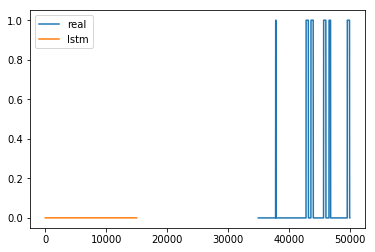

In [9]:
pyplot.plot(test_df['anomaly'], label='real')
pyplot.plot(predicted_lstm, label='lstm')
pyplot.legend()
pyplot.show()